                                Preguntas Teoricas

## ***8. ¿Qué hacen async y await por nosotros?***

[*Un repaso y al lio* ▶ ](https://youtu.be/6O8ax3JYboc?t=96)


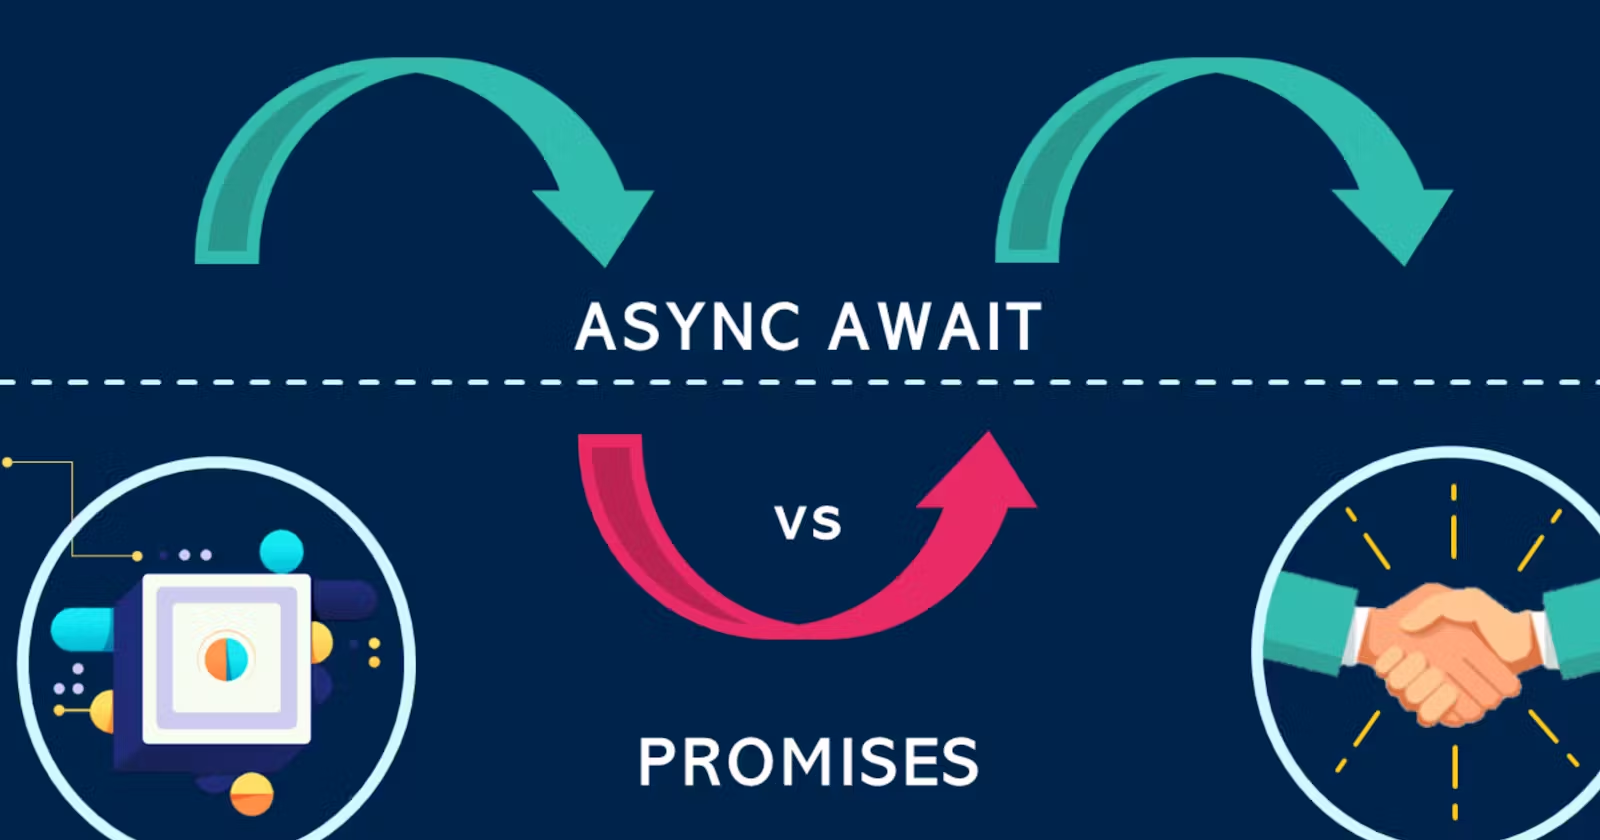

Las palabras clave **async/await**, que no son más que una forma de azúcar sintáctico para **gestionar las promesas** de una forma más similar a lo que solemos estar acostumbrados. Recordemos un fragmento de código donde manejamos promesas mediante .then():

In [ ]:
fetch("/robots.txt")
  .then((response) => response.text())
  .then((data) => console.log(data));

console.log("Código síncrono.");

Con **async/await** seguimos manejando promesas, sin embargo, hay ciertos cambios importantes:

+ No encadenamos mediante **.then()**, sino que usamos un sistema más tradicional.
+ Abandonamos el modelo **no bloqueante** y pasamos a uno **bloqueante**.

### La palabra clave await

Vamos a modificar el fragmento de código anterior, para manejar la *promise* que devuelve el **fetch()**, pero en lugar de gestionarla con **.then()**, lo haremos con await. Simplemente, cualquier *promise* que tengamos, le añadimos la palabra clave **await** antes.

In [ ]:
const response = await fetch("/robots.txt");
const data = await response.text();
console.log(data);

console.log("Código síncrono.");

> Lo que hace **await** es **detener la ejecución y no continuar**. Se espera a que se resuelva la promesa, y **hasta que no lo haga**, no continua. A diferencia del **.then()**, aquí tenemos un código **bloqueante**.

Ahora, vamos a introducir este fragmento de código dentro de una función llamada request(). Quedaría de la siguiente forma:

In [ ]:
function request() {
  const response = await fetch("/robots.txt");
  const data = await response.text();
  return data;
}

request();

Sin embargo, aquí tenemos un problema. Estamos utilizando **await** (***asíncrono***) dentro de **request()** (***síncrono***), por lo que antes de ejecutarla, al intentarla definir, nos aparecerá el siguiente *error*:

> **Uncaught SyntaxError: await is only valid in async functions and the top level bodies of modules**

### La palabra clave async  

Para resolver el problema anterior y poder utilizar el await dentro de nuestra función, sólo tenemos que definir nuestra función como función asíncrona y al llamarla utilizar nuevamente el await:

In [ ]:
async function request() {
  const response = await fetch("/robots.txt");
  const data = await response.text();
  return data;
}

await request();

Sin embargo, vamos a pararnos un poco a pensar esto desde las bases...  
Definamos **dos funciones básicas exactamente iguales**, ambas devuelven lo mismo, pero una es **síncrona** y otra **asíncrona**:

In [ ]:
function sincrona() { return 42; }
async function asincrona() { return 42; }

sincrona();   // 42
asincrona();  // Promise <fulfilled>: 42

En el caso de la función *sincrona()* devuelve directamente el valor, sin embargo, en el caso de la función *asincrona()* devuelve una **promesa que se ha cumplido** inmediatamente, con el valor 42.

> Recuerda que en el caso de querer controlar errores o promesas rechazadas con **async/await**, siempre podrás usar bloques **try/catch**.

### Async/await + .then()  

En algunos casos, como **al usar un fetch()**, donde tenemos que manejar **dos promesas**, es posible que nos interese utilizar **.then() para la primera** promesa y **await para la segunda**. De esta forma podemos **manejarlo todo directamente**, sin tener que guardarlo en constantes o variables temporales que no utilizaremos sino una sola vez:

In [ ]:
async function request() {
    return await fetch("/robots.txt")
        .then(response => response.text());
  }
  
  await request();

En este caso, observa que el *fetch()* devuelve una primera  que es manejada por el *.then()*. La segunda , devuelta por el método *response.text()* se devuelve hacia fuera y es manejada por el await, que espera a que se cumpla, y una vez cumplida, se devuelve como valor de la función r*equest()*.

### [Top level](https://caniuse.com/mdn-javascript_operators_await_top_level) **await** 

En principio, el comportamiento de await solo permite que se utilice en el interior de funciones declaradas como async. Por lo que, si el ejemplo anterior lo ejecutamos en una consola de Javascript, funcionará correctamente (estamos escribiendo comandos de forma asíncrona), pero *si lo escribimos en un fichero*, probablemente nos aparecerá el siguiente *error*:

> **Uncaught SyntaxError: await is only valid in async function**

Esto ocurre porque, como bien dice el mensaje de error, estamos *ejecutando await en el contexto global* de la aplicación, y debemos *ejecutarlo en un contexto de función asíncrona*. Muchas veces, para solucionar esto, lo que se suele hacer es lo siguiente:

In [ ]:
function request() {
    return (async () => await fetch("/robots.txt"))();
}

Hemos incluido la función asíncrona con el *await dentro de un paréntesis* que la envuelve y ejecuta     *(función)()*, por lo que tenemos una función asíncrona autoejecutable en un contexto síncrono.  

### Asincronía con async/await

La función *doTask()* realiza 10 lanzamientos de un dado y nos devuelve los resultados obtenidos o detiene la tarea si se obtiene un 6. La implementación de la función sufre algunos cambios, simplificándose considerablemente.

En primer lugar, añadimos la palabra clave async antes de los parámetros de la arrow function.
En segundo lugar, desaparece cualquier mención a promesas, se devuelven directamente los objetos, ya que al ser una función async se devolverá todo envuelto en una promesa:

In [ ]:
const doTask = async (iterations) => {
  const numbers = [];

  for (let i = 0; i < iterations; i++) {
    const number = 1 + Math.floor(Math.random() * 6);
    numbers.push(number);
    if (number === 6) {
      return {
        error: true,
        message: "Se ha sacado un 6",
      };
    }
  }

  return {
    error: false,
    value: numbers,
  };
};

Pero donde se introducen cambios considerables es a la hora de consumir las promesas con *async/await*. No tendríamos que utilizar *.then()*, sino que podemos simplemente utilizar *await* para esperar la resolución de la promesa, obteniendo el valor directamente:

In [ ]:
const resultado = await doTask(10);   // Devuelve un objeto, no una promesa

Ciertos casos no permiten usar async/await. Por ejemplo, una función *.map()* de un array de promesa. En esos casos, se recomienda usar un *for.....of* o una promesa en grupo.

### Promesas estáticas  

Mediante los **métodos estáticos Promise.resolve()** y **Promise.reject()** podemos devolver una promesa cumplida o rechazada respectivamente sin necesidad de crear una promesa con **new Promise()**, algo que podría ser interesante o cómodo en algunos casos.

Observa que la siguiente **función doTask() no es asíncrona**:

In [ ]:
const doTask = () => {
  const number = 1 + Math.floor(Math.random() * 6);
  const isEven = number % 2 === 0;

  return isEven ? Promise.resolve(number) : Promise.reject(number);
};

En este caso, generamos un número aleatorio y se devuelve una promesa. Cuando el número generado es par se cumple la promesa, cuando es impar, se rechaza. Sin embargo, ten en cuenta que el problema en este caso es que la promesa no «envuelve» toda la función, por lo que si la tarea tardase algún tiempo en generar el número, no podríamos utilizar el .then() para consumir la promesa.

> **Estas funciones estáticas se suelen utilizar en muy pocos casos, para mantener cierta compatibilidad en funciones que se espera que devuelvan una promesa.**

[Saber Más: 🧠 ](https://developer.mozilla.org/es/docs/Web/JavaScript/Reference/Statements/async_function)

                                                            EJERCICIOS

* Ejercicio 1:  
**Crear una función que retorne una promesa que se resuelva después de 2 segundos.**

* Ejercicio 2:  
**Crear una función asíncrona que espere el resultado de varias promesas y las una en una sola variable saludo.**

* Ejercicio 3:  
**Crear una función asíncrona que maneje el error de una promesa rechazada.**

* Ejercicio 4:  
**Promesa con async/await Crea una función asíncrona que espere a que se resuelva una promesa que devuelve el mensaje “¡Hecho!” después de 1 segundo.**

* Ejercicio 5:  
**Crea una función asíncrona que intente esperar a que se resuelva una promesa que se rechaza con el mensaje “¡Error!” después de 1 segundo. Asegúrate de manejar el error correctamente.**

* Ejercicio 6:  
**Crear una función asíncrona que maneje el error de una petición HTTP fallida.**

👍 [Ejercicios  :](ej8.js)